This notebook is an example for how to embed plots directly from Ferret into a Jupyter Notebook using ferretmagic.  Many thanks to Patrick Brockmann and the [ferretmagic documentation](https://github.com/PBrockmann/C-CASCADES_notebooks/blob/master/ferretBasics.ipynb) for providing an excellent starting point!

In [1]:
%load_ext ferretmagic

In [2]:
%%ferret

cancel data/all
use /home/jovyan/data/1_mesh_mask.nc
use /home/jovyan/data/V20_1948_2009_SSH.nc
show data


currently SET data sets:
 1> /home/jovyan/data/1_mesh_mask.nc
 name title I J K L
 NAV_LON Longitude 1:1784 1:1719 ... ...
 NAV_LAT Latitude 1:1784 1:1719 ... ...
 NAV_LEV ... ... 1:46 ...
 TIME_COUNTER
 ... ... ... 1:1
 TMASK 1:1784 1:1719 1:46 1:1
 UMASK 1:1784 1:1719 1:46 1:1
 VMASK 1:1784 1:1719 1:46 1:1
 FMASK 1:1784 1:1719 1:46 1:1
 TMASKUTIL
 1:1784 1:1719 ... 1:1
 UMASKUTIL
 1:1784 1:1719 ... 1:1
 VMASKUTIL
 1:1784 1:1719 ... 1:1
 FMASKUTIL
 1:1784 1:1719 ... 1:1
 GLAMT 1:1784 1:1719 ... 1:1
 GLAMU 1:1784 1:1719 ... 1:1
 GLAMV 1:1784 1:1719 ... 1:1
 GLAMF 1:1784 1:1719 ... 1:1
 GPHIT 1:1784 1:1719 ... 1:1
 GPHIU 1:1784 1:1719 ... 1:1
 GPHIV 1:1784 1:1719 ... 1:1
 GPHIF 1:1784 1:1719 ... 1:1
 E1T 1:1784 1:1719 ... 1:1
 E1U 1:1784 1:1719 ... 1:1
 E1V 1:1784 1:1719 ... 1:1
 E1F 1:1784 1:1719 ... 1:1
 E2T 1:1784 1:1719 ... 1:1
 E2U 1:1784 1:1719 ... 1:1
 E2V 1:1784 1:1719 ... 1:1
 E2F 1:1784 1:1719 ... 1:1
 E3T 1:1784 1:1719 1:46 1:1
 E3U 1:1784 1:1719 1:46 1:1
 E3V 1:1784 1:1719 1:46 1:1
 E3W 1:1784 1:1719 1:46 1:1
 FF 1:1784 1:1719 ... 1:1
 MBATHY 1:1784 1:1719 ... 1:1
 HDEPT 1:1784 1:1719 ... 1:1
 HDEPW 1:1784 1:1719 ... 1:1
 E3T_PS 1:1784 1:1719 ... 1:1
 E3W_PS 1:1784 1:1719 ... 1:1
 GDEPT_0 ... ... 1:46 1:1
 GDEPW_0 ... ... 1:46 1:1
 E3T_0 ... ... 1:46 1:1
 E3W_0 ... ... 1:46 1:1
 
 2> /home/jovyan/data/V20_1948_2009_SSH.nc (default)
 name title I J K L
 NAV_LAT Latitude 1:1784 1:1719 ... ...
 SOSSHEIG Sea Surface Height 1:1784 1:1719 ... 1:4526

! Enter_GO land
! Exit_GO


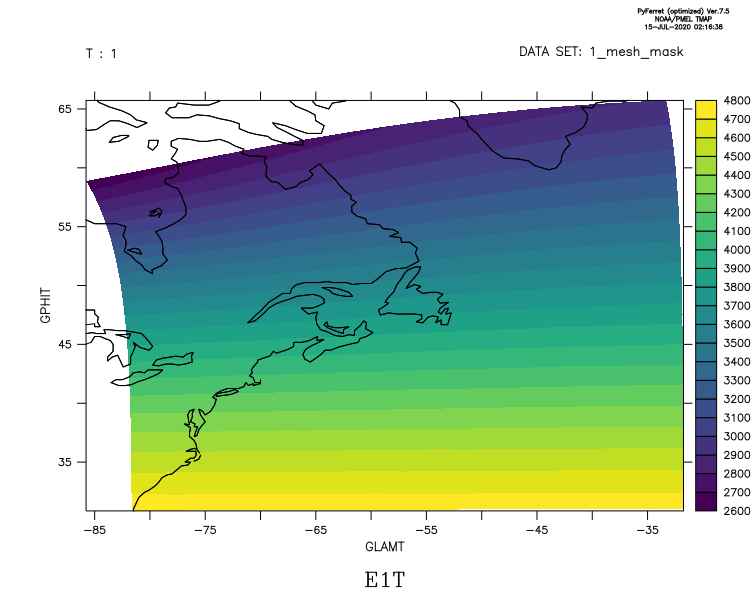

In [3]:
%%ferret
set memory /size=9000
! As in regular ferret, there are sometimes boundary errors when making
! plots in curvilinear coordinates.  To bypass this, explicitly plot
! only a subset of the data.  Also, it looks like there are issues with
! plotting too much data (perhaps running out of memory).  The kernal
! dies if I run the same command with 1783 and 1719.  Sort that out later.
shade e1t[d=1,i=2:1000,j=2:1000],glamt[d=1,i=2:1000,j=2:1000],gphit[d=1,i=2:1000,j=2:1000]; go land

! Enter_GO land
! Exit_GO


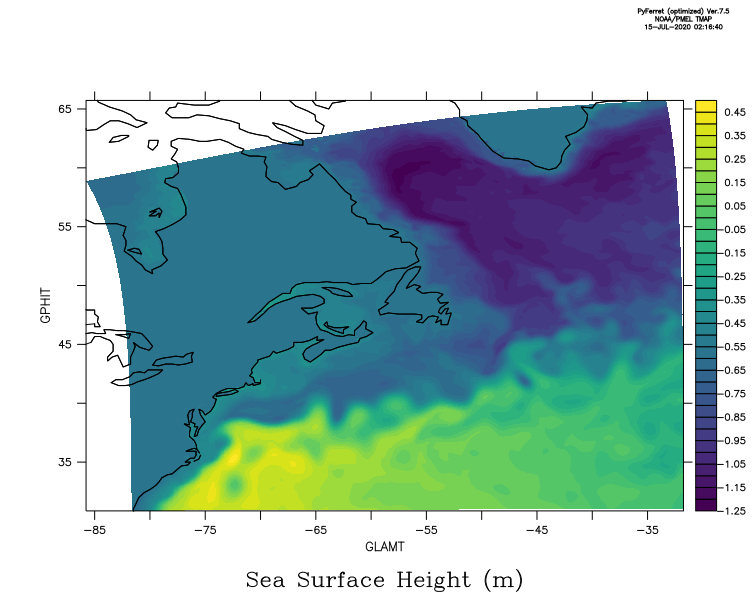

In [4]:
%%ferret
set memory /size=9000
shade sossheig[d=2,l=1,i=2:1000,j=2:1000],glamt[d=1,i=2:1000,j=2:1000],gphit[d=1,i=2:1000,j=2:1000]; go land

! Enter_GO land
! Exit_GO


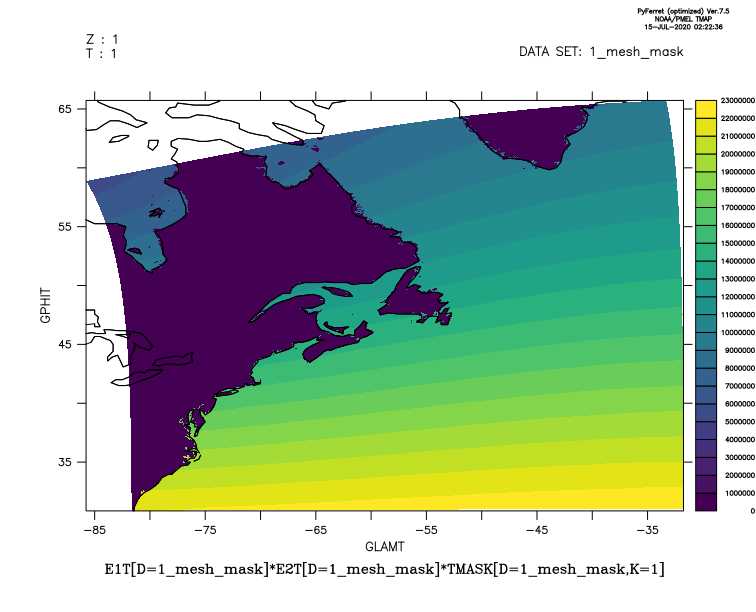

In [10]:
%%ferret
let ssh_mask = sossheig[d=2,l=1]*tmask[d=1,k=1]
let area = e1t[d=1]*e2t[d=1]*tmask[d=1,k=1]
shade area[i=2:1000,j=2:1000],glamt[d=1,i=2:1000,j=2:1000],gphit[d=1,i=2:1000,j=2:1000]; go land